# EcoFOCIpy ADCP QC - 20CKP-12A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('20ckp12a_0046m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 25347, depth: 13)
Coordinates:
  * time             (time) datetime64[ns] 2020-09-10 ... 2022-02-20T01:00:00
  * depth            (depth) float64 -8.0 -4.0 -0.0 4.0 ... 28.0 32.0 36.0 40.0
  * latitude         (latitude) float64 67.91
  * longitude        (longitude) float64 -168.2
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan ... 1.987
    v_curr_comp      (latitude, longitude, time, depth) float64 nan ... 0.5487
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... -0.3
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... 0.1
    agc1             (latitude, longitude, time, depth) float64 nan ... 107.0
    agc2             (latitude, longitude, time, depth) float64 nan ... 107.0
    agc3             (latitude, longitude, time, depth) float64 nan ... 108.0
    agc4             (latitude, longitude, time, depth) float64 nan ... 108.0
Attributes:
    Latitude_DegMMddW:                      67 54.82 N
    Longitude_DegMMddN:                     168 11.83 W
    MooringID:                              20CKP-12A
    platform_deployment_date:               2020-09-11T02:52:00Z
    platform_deployment_cruise_name:        DY2012
    platform_recovery_date:                 2022-10-23T18:23:00Z
    platform_recovery_cruise_name:          SKQ2022-14S
    platform_deployment_recovery_comments:  Heavy bio-fouling on all instrume...
    WaterDepth:                             59.0
    date_created:                           2022-11-22T15:09:16Z
    date_modified:                          
    QC_indicator:                           unknown

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

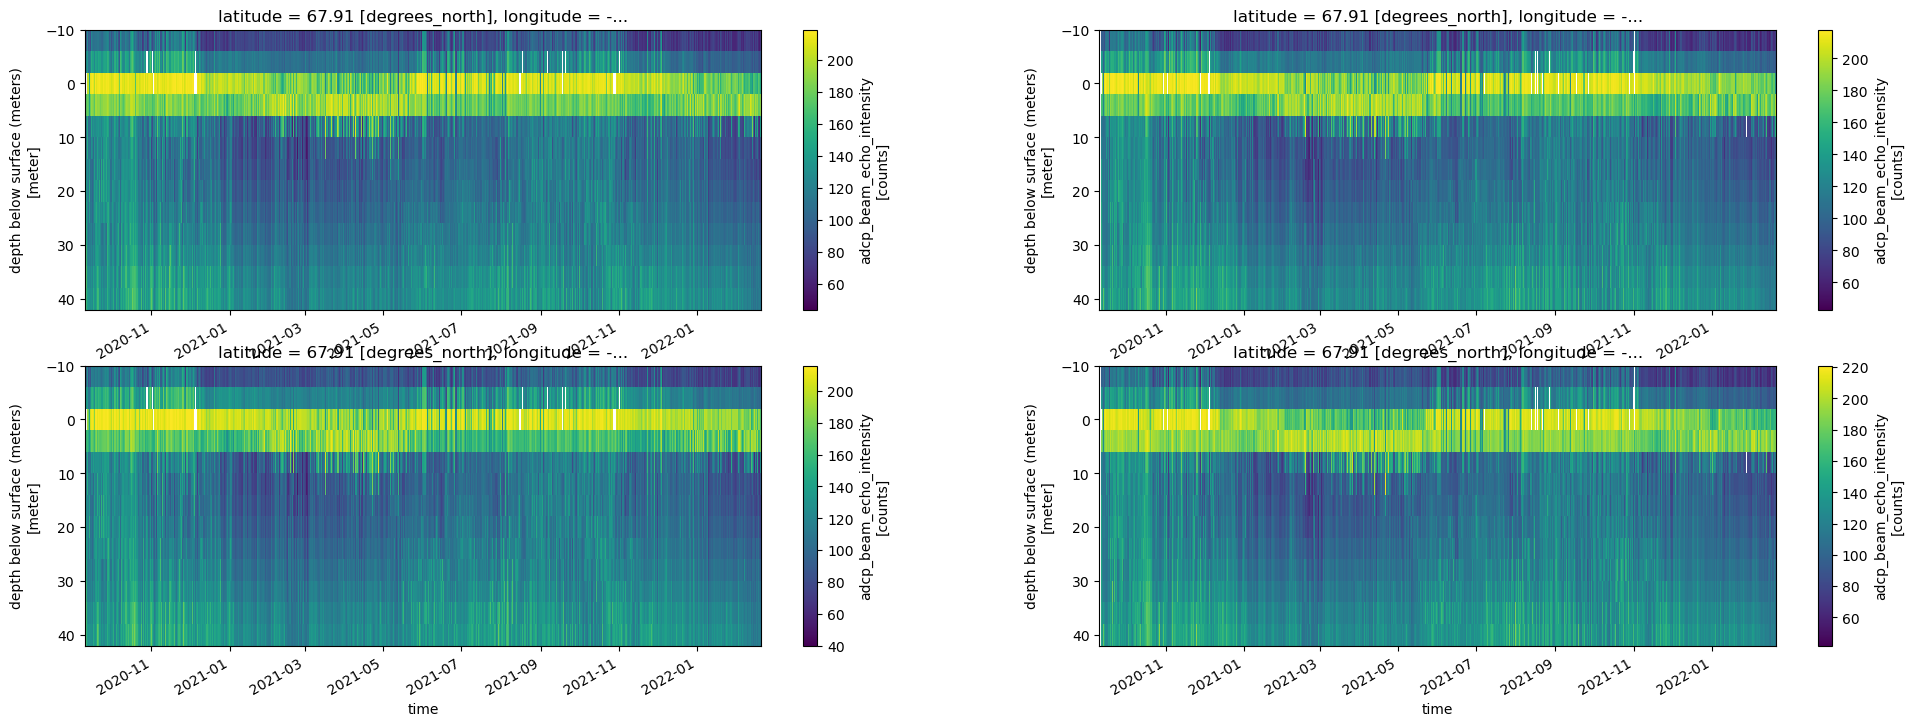

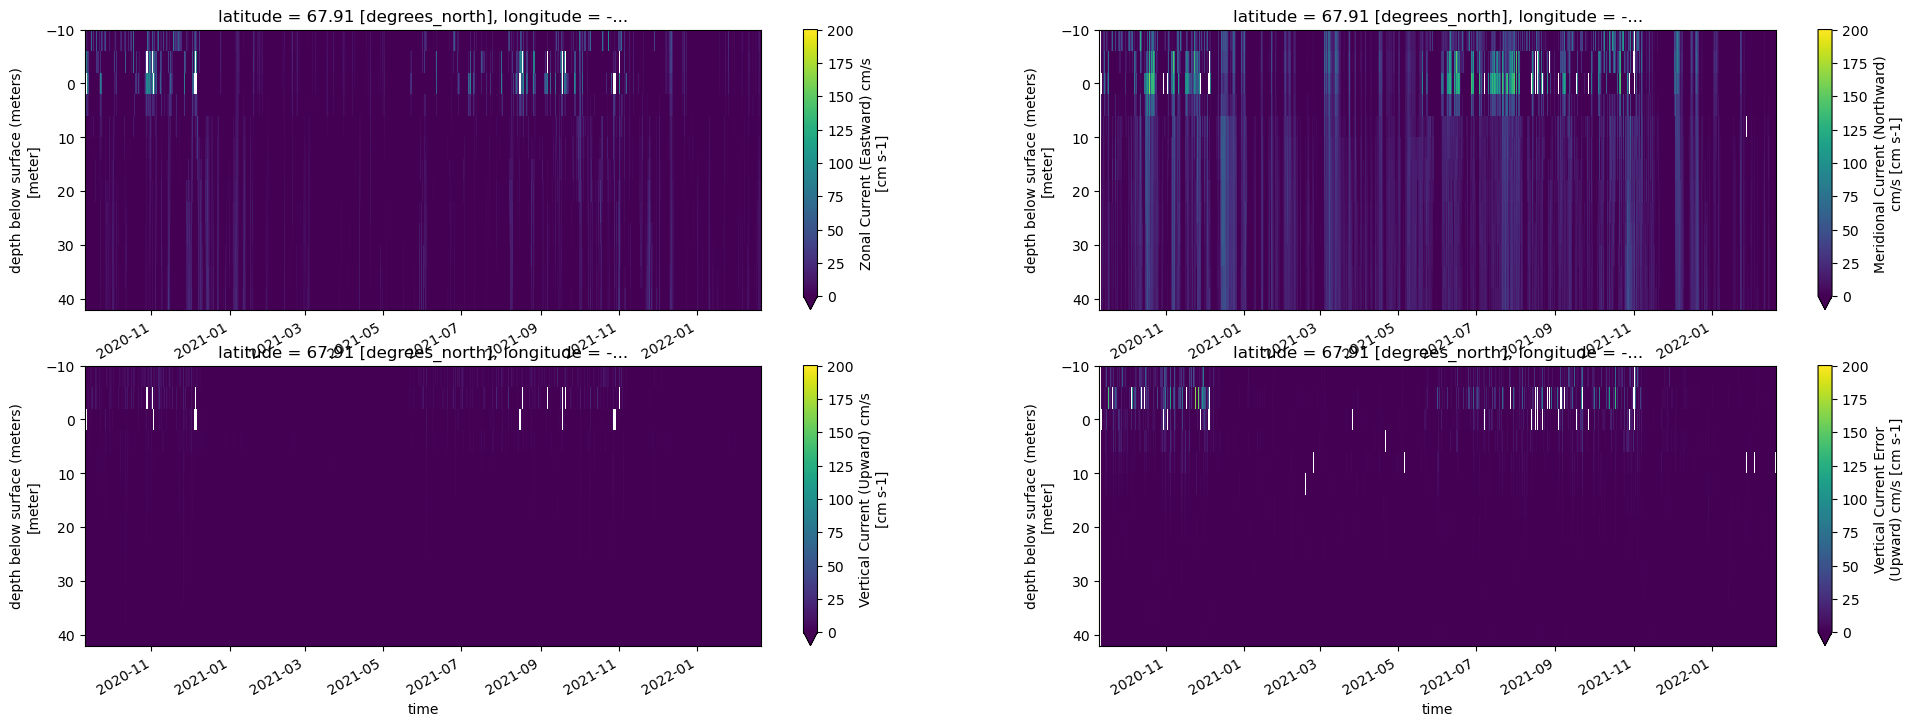

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [6]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >100cm/s'    

## Trim above surface (negative values)

In [7]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [8]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [9]:
ixdf.to_netcdf('20ckp12a_0046m.trimmed.nc')

In [10]:
xdf = xa.load_dataset('20ckp12a_0046m.trimmed.nc')

In [11]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

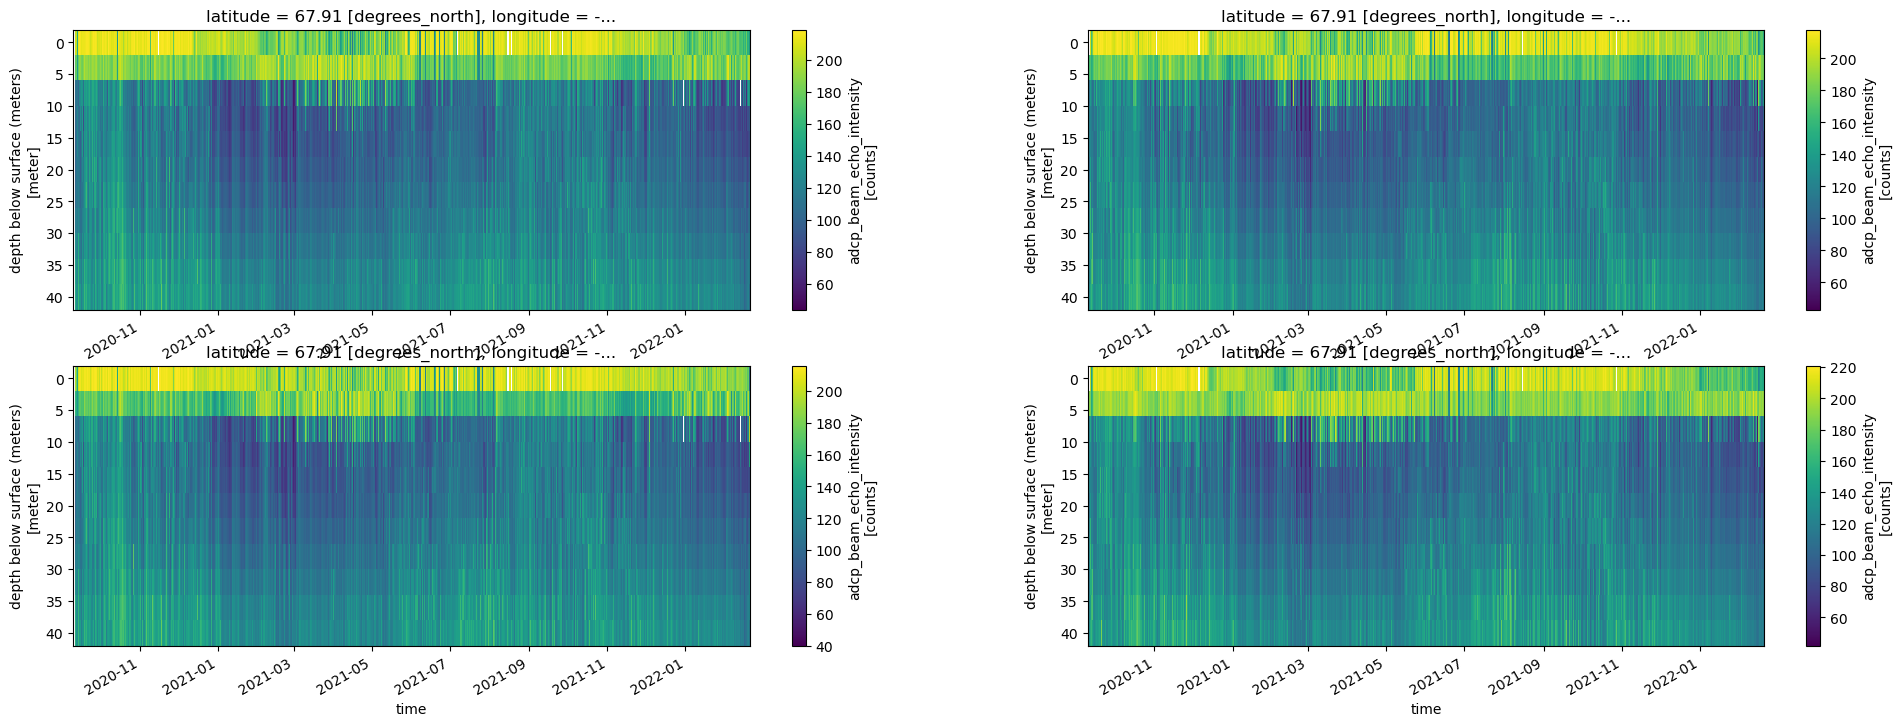

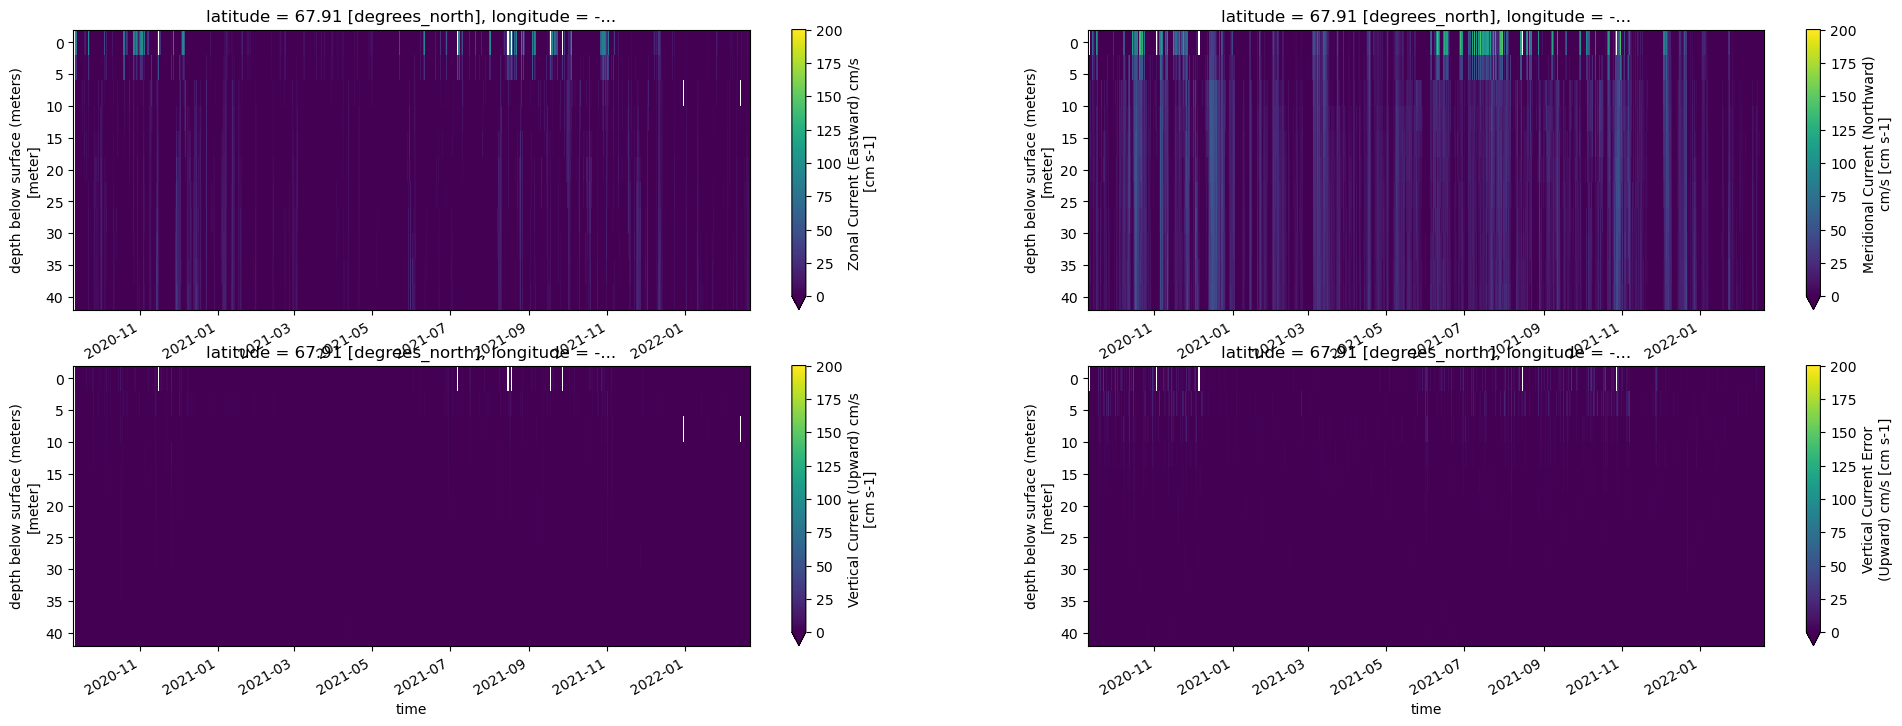

In [13]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [15]:
ixdf.to_netcdf('20ckp12a_0046m.filtered.nc')